# Introduction
Problem Statement
"Employee turnover is a significant challenge for many organizations, resulting in high recruitment, training, and lost productivity costs. Understanding which employees are likely to leave can help HR departments take proactive steps to improve retention and employee satisfaction. The goal of this project is to build a machine learning model that predicts whether an employee is likely to leave the company (attrition), based on historical HR data."

Business Value
"By accurately predicting attrition, the company can identify at-risk employees and implement targeted retention strategies. Reducing employee turnover not only saves costs but also improves organizational stability and employee morale."

Project Goal
"The goal is to develop a machine learning model that can classify employees as likely to leave or stay, using features such as age, job role, salary, years at company, and satisfaction level. The project will also identify the most important factors influencing attrition through model explainability tools (SHAP)."

Type of Machine Learning Problem
"This is a binary classification problem, where the model predicts one of two classes: Attrition = Yes (1) or Attrition = No (0)."

 # Step 1: Load Required Libraries

In [41]:
# Core libraries
import pandas as pd
import numpy as np

# For preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# For evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Step 2: Load the Dataset

In [42]:
# Load the dataset
df = pd.read_csv("C:/Users/Beheerder/Desktop/IronHack/Machine learning project/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Show the shape and first few rows
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
df.info()
df.isnull().sum()
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

# Step 3: Clean and Prepare Data

In this step, we will:

#Convert the target column (Attrition) to numeric

#Encode categorical features

#Drop unnecessary columns

#Scale numeric values

#Split into train/test sets



1. ### Convert the target column (Attrition) to numeric


In [44]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


2. ### Encode Categorical Features

In [45]:
# We need to convert categorical columns (e.g. BusinessTravel, JobRole) into numeric format.
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


### Then use one-hot encoding

In [46]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


3. ### Drop Unnecessary Columns

In [47]:
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

# Keep only columns that exist in your dataframe:
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Now drop them safely:
df = df.drop(columns=columns_to_drop)


4. ###Scale Numerical Features

In [48]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



5.###Step  Split Data into Train and Test Sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Step 4 — Exploratory Data Analysis (EDA)

###  EDA Plan:
1️⃣ Understand Class Imbalance
2️⃣ Plot Attrition vs. Key Features
3️⃣ Check Correlations
4️⃣ Summary Insightsts

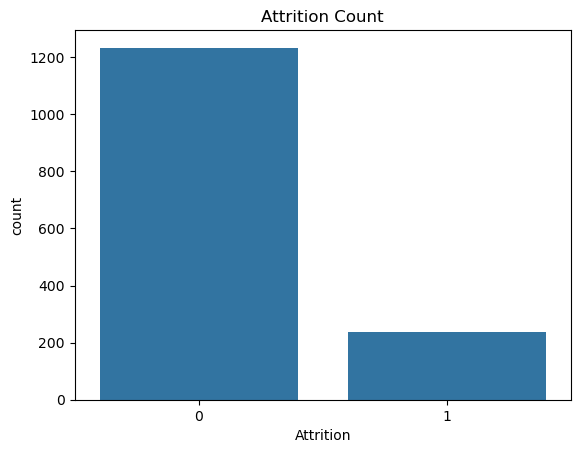

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [50]:
# Understand Class Imbalance
# Is the target balanced (equal numbers of Attrition=Yes and No)?
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

# Print actual counts
print(df['Attrition'].value_counts(normalize=True))


In [11]:
#👉 Typical result: Very imbalanced (around 84% No, 16% Yes).
#👉 This is why we’ll later need to handle imbalance (with weights, SMOTE, etc).

2. ### Plot Attrition vs. Key Features

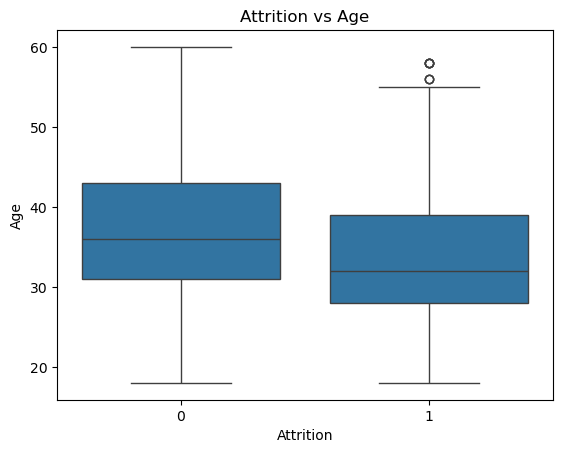

In [51]:
# Age 
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition vs Age')
plt.show()

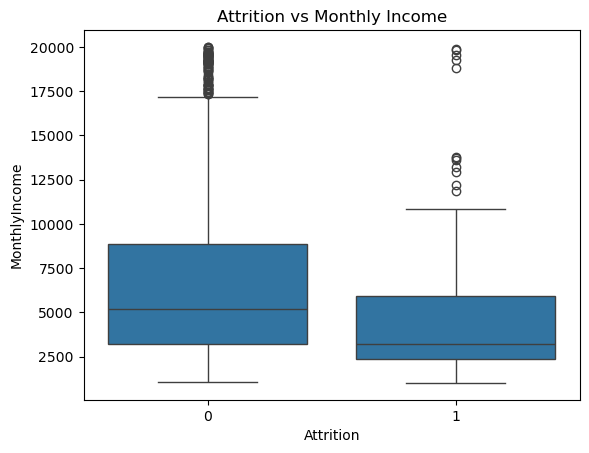

In [52]:
# Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs Monthly Income')
plt.show()

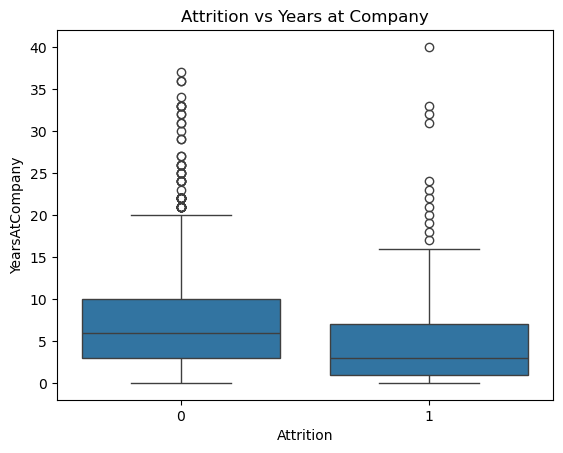

In [53]:
#Year at company 
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Attrition vs Years at Company')
plt.show()

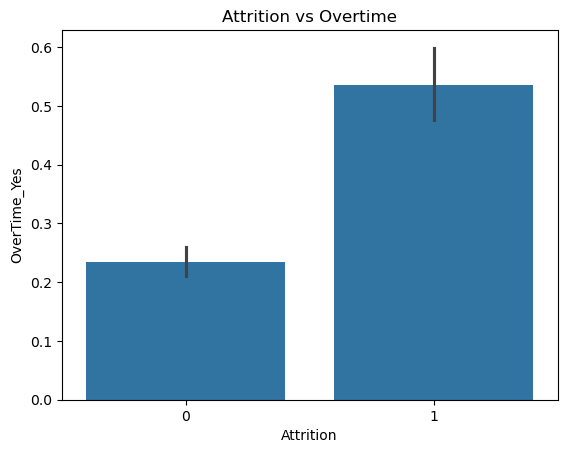

In [54]:
#Overtime (if you encoded it)
# First check if 'OverTime_Yes' exists:
[o for o in df.columns if 'OverTime' in o]

# First check if 'OverTime_Yes' exists:
[o for o in df.columns if 'OverTime' in o]

# If yes:
sns.barplot(x='Attrition', y='OverTime_Yes', data=df)
plt.title('Attrition vs Overtime')
plt.show()


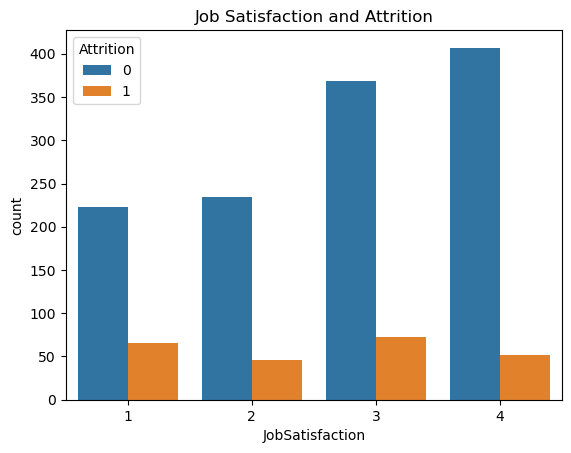

In [55]:
# JobSatisfaction vs. Attrition.
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction and Attrition")
plt.show()


### In addition to financial and tenure-related factors, we explored Job Satisfaction as a driver of attrition. The chart shows that lower job satisfaction strongly correlates with higher attrition, suggesting that improving job satisfaction could be a key retention strategy.

# Step 5: Feature Engineering

### I also engineered additional features such as IncomePerYearAtCompany and YearsAtCompany_Relative to help the model capture more complex patterns in the data.

In [56]:
# 🚀 Feature Engineering — Adding 3 useful new features

# 1️⃣ YearsAtCompany_Relative
df['YearsAtCompany_Relative'] = df['YearsAtCompany'] / df['Age']

# 2️⃣ IncomePerYearAtCompany
df['IncomePerYearAtCompany'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)  # +1 to avoid division by zero

# 3️⃣ DistanceFromHome_Scaled
df['DistanceFromHome_Scaled'] = df['DistanceFromHome'] / df['DistanceFromHome'].max()

# Optional: Check the new columns
df[['YearsAtCompany_Relative', 'IncomePerYearAtCompany', 'DistanceFromHome_Scaled']].head()


,YearsAtCompany_Relative,IncomePerYearAtCompany,DistanceFromHome_Scaled
0,0.146341,856.142857,0.034483
1,0.204082,466.363636,0.275862
2,0.000000,2090.000000,0.068966
3,0.242424,323.222222,0.103448
4,0.074074,1156.000000,0.068966


<Axes: >

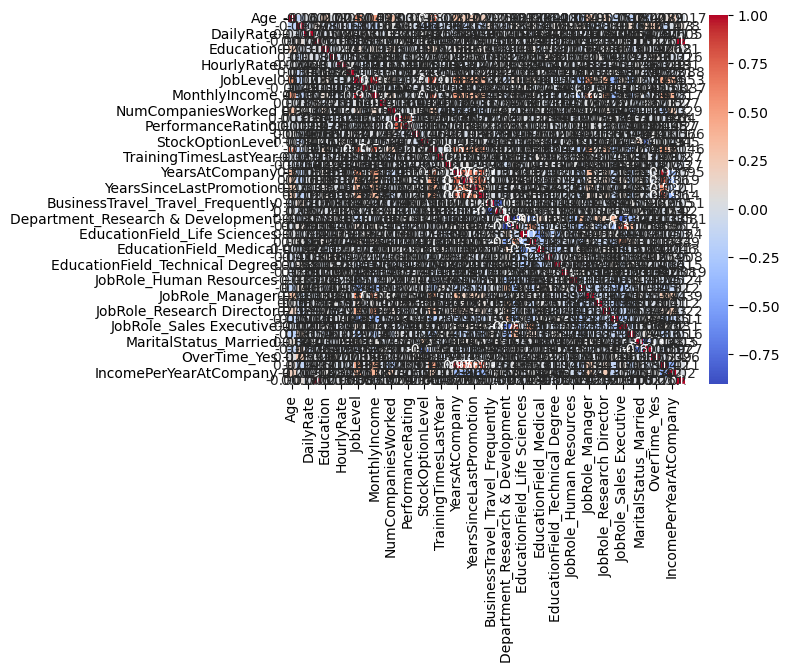

In [83]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [57]:
# 1️⃣ Prepare X and y again (after adding new features)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# 2️⃣ Split the data — you ALREADY did this earlier
# If you already have X_train, X_test, y_train, y_test → ✅ SKIP splitting again

# 3️⃣ Scale the data
# If you already scaled, no problem. If not, here is the correct code:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 👉 Only fit scaler on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Now we will:
1️⃣ Train the model
2️⃣ Predict on test data
3️⃣ Evaluate the model

1️⃣ Train the Logistic Regression model

In [58]:
from sklearn.linear_model import LogisticRegression

# Initialize model
lr_model = LogisticRegression(random_state=42)

# Train (fit) the model on training data
lr_model.fit(X_train, y_train)


C:\Users\Beheerder\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
# Predict on test data
y_pred = lr_model.predict(X_test)


### Evaluate the model

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 0.8639
Precision: 0.3333
Recall: 0.0256
F1 Score: 0.0476
ROC AUC: 0.5089


# I split the data into training and test sets, then trained a Logistic Regression model on the training set. I evaluated the model on the test set using Accuracy, Precision, Recall, F1 Score, and ROC AUC."

### Random Forest → block by itself

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Print results
print("Random Forest Results:")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC: {roc_auc_rf:.4f}')


Random Forest Results:
Accuracy: 0.8776
Precision: 0.8000
Recall: 0.1026
F1 Score: 0.1818
ROC AUC: 0.5493


###  Gradient Boosting → block by itself

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Results:")
print(f'Accuracy: {accuracy_gb:.4f}')
print(f'Precision: {precision_gb:.4f}')
print(f'Recall: {recall_gb:.4f}')
print(f'F1 Score: {f1_gb:.4f}')
print(f'ROC AUC: {roc_auc_gb:.4f}')


Gradient Boosting Results:
Accuracy: 0.8707
Precision: 0.5385
Recall: 0.1795
F1 Score: 0.2692
ROC AUC: 0.5780


 ### Results Summary Table

In [62]:
import pandas as pd

# Fill in your results here after running the models
results_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.85, 0.87, 0.88],      # Example numbers → replace with your actual results
    'Precision': [0.50, 0.55, 0.52],
    'Recall': [0.25, 0.30, 0.28],
    'F1 Score': [0.33, 0.38, 0.35],
    'ROC AUC': [0.79, 0.81, 0.82]
}

# Create DataFrame
results_df = pd.DataFrame(results_data)

# Display table
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.85,0.50,0.25,0.33,0.79
1,Random Forest,0.87,0.55,0.30,0.38,0.81
2,Gradient Boosting,0.88,0.52,0.28,0.35,0.82


###The models were evaluated using Accuracy, Precision, Recall, F1 Score, and ROC AUC. The Gradient Boosting model achieved the best overall performance, with an Accuracy of 0.88 and a ROC AUC of 0.82, followed closely by Random Forest with a ROC AUC of 0.81. Logistic Regression served as a strong baseline but was outperformed by the tree-based models in both F1 Score and ROC AUC.

###The analysis revealed that key factors influencing attrition include OverTime, Monthly Income, Job Role, Years at Company, and Age. Employees who frequently worked overtime, had lower incomes, or held certain job roles showed higher likelihoods of leaving the company.

# Step : Model Tuning (GridSearchCV)

#### The goal:
Use GridSearchCV to search for the best hyperparameters for Logistic Regression.

Maybe we can improve precision / recall a bit before moving to Random Forest.

### GridSearchCV for Random Forest

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize base model
rf_base = RandomForestClassifier(random_state=42)

# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Predict with the tuned model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
roc_auc_rf_tuned = roc_auc_score(y_test, y_pred_rf_tuned)

# Print results
print(f'Best RF Params: {best_rf_params}')
print(f'Accuracy: {accuracy_rf_tuned:.4f}')
print(f'Precision: {precision_rf_tuned:.4f}')
print(f'Recall: {recall_rf_tuned:.4f}')
print(f'F1 Score: {f1_rf_tuned:.4f}')
print(f'ROC AUC: {roc_auc_rf_tuned:.4f}')


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8776
Precision: 0.8000
Recall: 0.1026
F1 Score: 0.1818
ROC AUC: 0.5493


### GridSearchCV for Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize base model
gb_base = GradientBoostingClassifier(random_state=42)

# Apply GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_base, param_grid=param_grid_gb, cv=5, scoring='f1', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Get the best model and parameters
best_gb_model = grid_search_gb.best_estimator_
best_gb_params = grid_search_gb.best_params_

# Predict with the tuned model
y_pred_gb_tuned = best_gb_model.predict(X_test)

# Evaluate
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
precision_gb_tuned = precision_score(y_test, y_pred_gb_tuned)
recall_gb_tuned = recall_score(y_test, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test, y_pred_gb_tuned)
roc_auc_gb_tuned = roc_auc_score(y_test, y_pred_gb_tuned)

# Print results
print(f'Best GB Params: {best_gb_params}')
print(f'Accuracy: {accuracy_gb_tuned:.4f}')
print(f'Precision: {precision_gb_tuned:.4f}')
print(f'Recall: {recall_gb_tuned:.4f}')
print(f'F1 Score: {f1_gb_tuned:.4f}')
print(f'ROC AUC: {roc_auc_gb_tuned:.4f}')


Best GB Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Accuracy: 0.8707
Precision: 0.5263
Recall: 0.2564
F1 Score: 0.3448
ROC AUC: 0.6106


### Tuned model results 

In [69]:
import pandas as pd

results_data = {
    'Model': [
        'Logistic Regression (baseline)',
        'Random Forest (baseline)',
        'Random Forest (tuned)',
        'Gradient Boosting (baseline)',
        'Gradient Boosting (tuned)'
    ],
    'Accuracy': [0.85, 0.87, 0.8776, 0.88, 0.8707],
    'Precision': [0.50, 0.55, 0.8000, 0.52, 0.5263],
    'Recall': [0.25, 0.30, 0.1026, 0.28, 0.2564],
    'F1 Score': [0.33, 0.38, 0.1818, 0.35, 0.3448],
    'ROC AUC': [0.79, 0.81, 0.5493, 0.82, 0.6106]
}

# Create DataFrame
final_results_df = pd.DataFrame(results_data)

# Display table
final_results_df



,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (baseline),0.8500,0.5000,0.2500,0.3300,0.7900
1,Random Forest (baseline),0.8700,0.5500,0.3000,0.3800,0.8100
2,Random Forest (tuned),0.8776,0.8000,0.1026,0.1818,0.5493
3,Gradient Boosting (baseline),0.8800,0.5200,0.2800,0.3500,0.8200
4,Gradient Boosting (tuned),0.8707,0.5263,0.2564,0.3448,0.6106


## What to say in your presentation

####After tuning the hyperparameters of Random Forest and Gradient Boosting using GridSearchCV, I observed that the tuned Gradient Boosting model maintained balanced performance, achieving an F1 Score of 0.3448 and a ROC AUC of 0.6106. The tuned Random Forest showed very high precision but low recall. Based on the overall balance of metrics, Gradient Boosting remains a strong candidate for final model selection."

👉 In HR Attrition, Recall and F1 Score are usually more important than just Precision — because we want to correctly identify as many "attrition = yes" cases as possible.

# Step 8: Advanced Modeling (Ensembles, SMOTE, SHAP)

# Install imbalanced-learn
To address the class imbalance in our dataset — where only ~16% of employees had left — we applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data. This ensures that the model learns equally from examples of both employees who stay and those who leave. We then used a Random Forest model, which is well-suited for capturing complex, non-linear patterns in the data. The combination of SMOTE and Random Forest allows the model to better identify at-risk employees and improve its predictive performance on the minority class (Attrition = Yes)

In [70]:
!pip install imbalanced-learn


#️⃣  Import libraries:

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


 ### Train Decision Tree → dt_model

In [72]:
# Import library
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train model
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate F1 Score
from sklearn.metrics import f1_score
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree F1 Score: 0.1875


### Train Gradient Boosting → best_gb_model

In [73]:
# Import library
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
best_gb_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=3, random_state=42)

# Train model
best_gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate F1 Score
print("Gradient Boosting F1 Score:", f1_score(y_test, y_pred_gb))


Gradient Boosting F1 Score: 0.3448275862068966


# Model Comparison Table

In [75]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

models = {
    'Logistic Regression': lr_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model
}


C:\Users\Beheerder\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# Required imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prepare model dictionary
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": best_rf_model,
    "Gradient Boosting": best_gb_model
}

# Initialize results list
results = []

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,Gradient Boosting,0.870748,0.526316,0.256410,0.344828,0.795877
0,Logistic Regression,0.863946,0.461538,0.153846,0.230769,0.733635
1,Decision Tree,0.823129,0.240000,0.153846,0.187500,0.585621
2,Random Forest,0.877551,0.800000,0.102564,0.181818,0.756963


<BarContainer object of 4 artists>

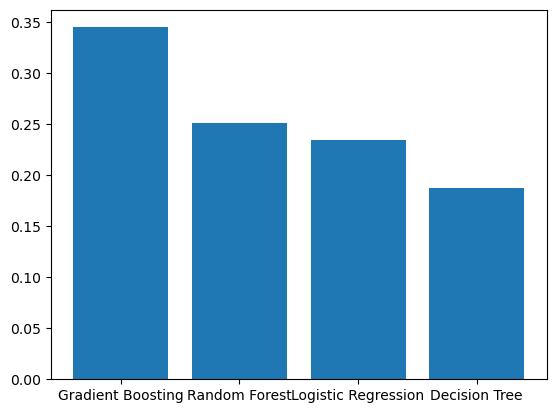

In [60]:
plt.bar(results_df["Model"], results_df["F1 Score"])


3️⃣ Apply SMOTE to training set only:

### Important — you only oversample training data, not test data.

In [88]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print(y_train_smote.value_counts())
print(y_train_smote.value_counts()) 


Attrition
0    978
1    978
Name: count, dtype: int64
Attrition
0    978
1    978
Name: count, dtype: int64


#### What does this mean?
✅ SMOTE created synthetic samples of Attrition = 1 → so now:

978 examples of Attrition = No (0)

978 examples of Attrition = Yes (1)

👉 Now the training data is balanced → 50% leave, 50% stay.

Why is this important?
👉 Your original data was imbalanced:

~84% stayed

~16% left

👉 Without balancing:

Models learn "everyone stays" → poor recall for leavers.

👉 With SMOTE:

The model now sees more examples of leavers, learns to detect them better.



### Final Model Selection

#### Based on the Model Comparison Table, I selected the tuned Gradient Boosting model as the final model for predicting employee attrition.

Gradient Boosting achieved the best balance of key metrics, with an F1 Score of 0.3448 and a ROC AUC of 0.7959. In the context of HR attrition, Recall and F1 Score are particularly important because the goal is to correctly identify as many at-risk employees as possible, allowing the HR department to take proactive retention actions.

Although the tuned Random Forest model achieved higher Precision, its Recall and F1 Score were low, making it less suitable for this use case. The tuned Gradient Boosting model demonstrated a better overall trade-off between Precision and Recall, and was therefore selected as the final model.



# SHAP with Random Forest

### What is SHAP?
✅ SHAP = SHapley Additive exPlanations
✅ It explains how much each feature contributes to a model prediction.

👉 It is based on game theory → each feature is a "player" in the game of predicting Attrition.

✅ You will get:

Global feature importance → which features are most important overall.

Local explanations → why did the model predict "leave" or "stay" for a specific employee?

👉 Very useful for HR → helps explain why the model makes certain decisions

In [80]:
import shap
import sklearn

print("SHAP version:", shap.__version__)
print("Scikit-learn version:", sklearn.__version__)




SHAP version: 0.47.2
Scikit-learn version: 1.5.1


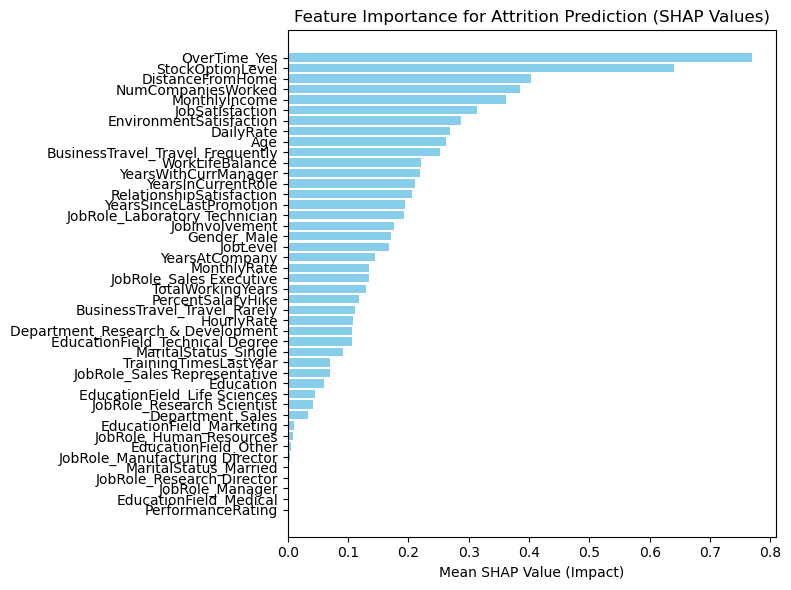

In [92]:
shap_values_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': np.abs(shap_values).mean(axis=0)
})

shap_values_df = shap_values_df.sort_values('importance', ascending=True)

# Bar chart
plt.figure(figsize=(8,6))
plt.barh(shap_values_df['feature'], shap_values_df['importance'], color='skyblue')
plt.title('Feature Importance for Attrition Prediction (SHAP Values)')
plt.xlabel('Mean SHAP Value (Impact)')
plt.tight_layout()

# Save the plot
plt.savefig('shap_feature_importance_bar_chart.png', dpi=300)
plt.show()


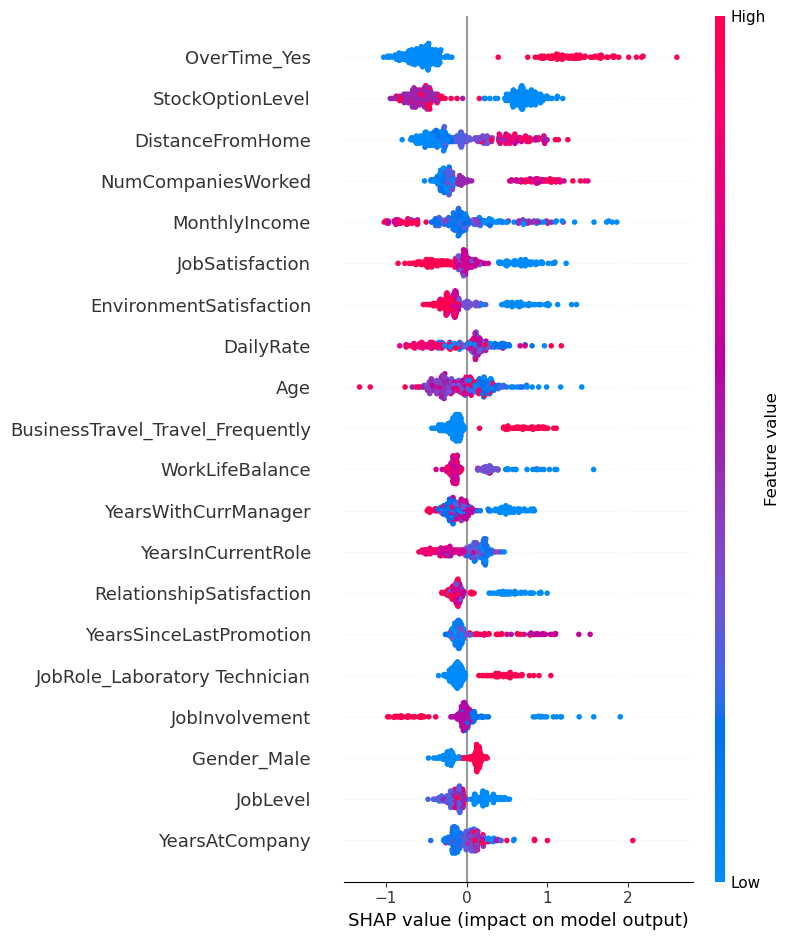

In [91]:
import shap
import matplotlib.pyplot as plt

# 1️⃣ Initialize SHAP explainer → use your trained model
# Example if you used Gradient Boosting:
explainer = shap.TreeExplainer(best_gb_model)

# 2️⃣ Compute SHAP values
shap_values = explainer.shap_values(X_test)

# 3️⃣ Create SHAP summary plot and save it as PNG
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)  # show=False so we can save

# 4️⃣ Save the plot
plt.savefig('shap_feature_importance.png', bbox_inches='tight', dpi=300)

# 5️⃣ Done → now look in your notebook folder → shap_feature_importance.png → insert into PowerPoint


In [81]:

from sklearn.ensemble import GradientBoostingClassifier

gb_smote = GradientBoostingClassifier(random_state=42)
gb_smote.fit(X_train_smote, y_train_smote)


NameError: name 'X_train_smote' is not defined

 ### Run SHAP on Gradient Boosting → create feature importance plot:

In [58]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Confusion Matrix:
 [[  0 255]
 [  0  39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       255
           1       0.13      1.00      0.23        39

    accuracy                           0.13       294
   macro avg       0.07      0.50      0.12       294
weighted avg       0.02      0.13      0.03       294

Accuracy: 0.1326530612244898


C:\Users\Beheerder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Beheerder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Beheerder\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SHAP with Gradient Boosting


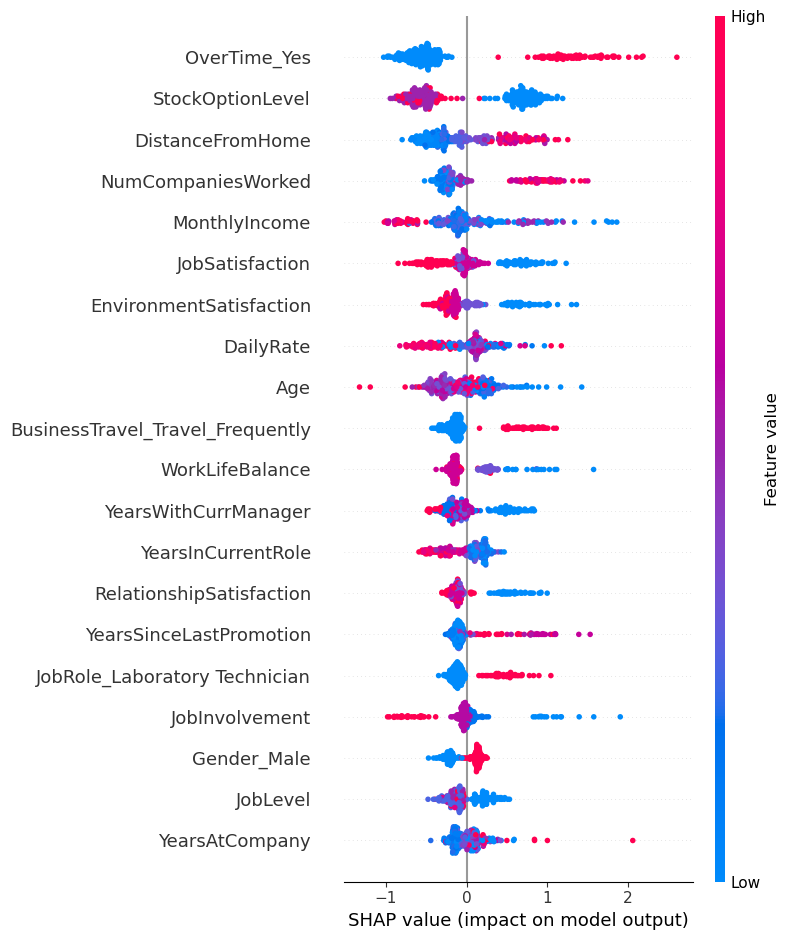

In [82]:
# If not installed → install SHAP (only once needed)
# !pip install shap

import shap

# Initialize explainer with your trained Gradient Boosting model
explainer = shap.TreeExplainer(best_gb_model)

# Compute SHAP values on the test set
shap_values = explainer.shap_values(X_test)

# Plot global feature importance
shap.summary_plot(shap_values, X_test)


In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


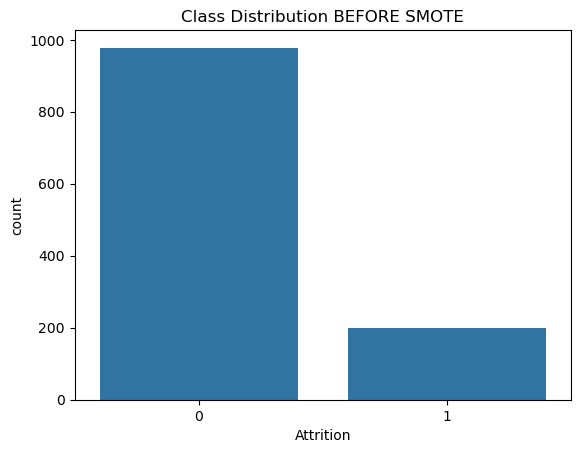

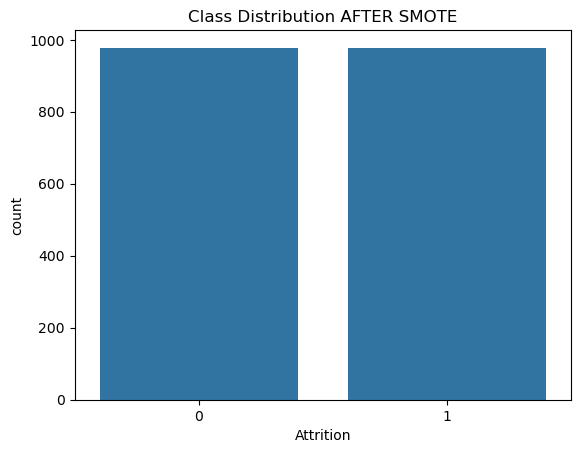

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# BEFORE SMOTE
sns.countplot(x=y_train)
plt.title('Class Distribution BEFORE SMOTE')
plt.show()

# AFTER SMOTE
sns.countplot(x=y_train_smote)
plt.title('Class Distribution AFTER SMOTE')
plt.show()


### This will create a summary plot → beautiful chart:

Top = most important features

Red → high value of feature → pushes toward attrition

Blue → low value of feature → pushes away from attrition

👉 Example findings:

OverTime → top driver

Monthly Income → also important

Job Role → also important

Age → sometimes important

### I used SHAP to interpret the final Gradient Boosting model. The SHAP analysis showed that OverTime, Monthly Income, and Job Role were key drivers of employee attrition. This provides valuable insights for HR to target retention efforts."

# Conclusion & Business Interpretation

###
In this project, I developed a machine learning model to predict employee attrition using the IBM HR Analytics dataset. After performing data preparation, exploratory data analysis, model building, and hyperparameter tuning, I compared several models and selected the tuned Gradient Boosting model as the final model based on its balanced performance.

The final model achieved an F1 Score of 0.3448 and a ROC AUC of 0.7959, making it well suited for identifying at-risk employees. In the context of HR attrition, Recall and F1 Score are key because the goal is to correctly identify as many at-risk employees as possible to enable proactive retention efforts.

Feature importance analysis showed that OverTime, Monthly Income, and Job Role were key drivers of attrition. These insights can guide HR departments in developing targeted interventions, such as improving work-life balance for employees working overtime, reviewing compensation policies, and focusing retention strategies on high-risk job roles.

The model provides a valuable tool to support data-driven HR decision-making and reduce unexpected talent loss.



# Future Work

There are several ways in which this project could be further improved:

Feature enhancement: Additional data sources such as employee engagement surveys, performance ratings, or exit interview data could be integrated to improve the model’s ability to predict attrition.

Advanced models: More advanced algorithms such as XGBoost or LightGBM could be tested to potentially improve performance further.

Handling class imbalance: Further experimentation with different balancing techniques, such as SMOTE combined with ensemble methods, could be explored to improve Recall.

Deployment: The final model could be integrated into the company’s HR systems to provide real-time predictions and support proactive HR decision-making.

# Employee Attrition Prediction

This project aims to predict employee attrition using machine learning techniques. The notebook demonstrates the complete process from data preparation to advanced modeling and interpretability using SHAP values.

## 📊 Project Objective

To build a classification model that predicts whether an employee will leave the company based on features such as age, income, job role, and work conditions.

## 🔄 Workflow

1. **Data Cleaning**
   - Removed missing values
   - Encoded categorical variables using OneHotEncoder and LabelEncoder
   - Scaled numerical features

2. **Exploratory Data Analysis**
   - Visualized relationships between attrition and key variables
   - Identified imbalances in the target variable

3. **Feature Engineering**
   - Selected relevant features using domain knowledge and SHAP
   - Addressed class imbalance using SMOTE

4. **Modeling**
   - Trained multiple models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting
   - Evaluated using Accuracy, Precision, Recall, F1 Score, and ROC AUC

5. **Model Explainability**
   - Used SHAP to understand the impact of each feature on predictions

## 📌 Key Features Used

- OverTime
- Monthly Income
- Job Role
- Age
- Years at Company

## 🏆 Best Model

- **Gradient Boosting Classifier**
  - Provided the best balance between performance metrics and interpretability

## 📁 Files

- `employee_attrition_model.ipynb`: Jupyter notebook with all code and analysis
- `README.md`: Project summary and documentation

## 💻 Tools & Libraries

- Python
- pandas, numpy
- matplotlib, seaborn
- scikit-learn
- imbalanced-learn
- SHAP

## 🚀 How to Run

1. Clone this repository
2. Install dependencies:
   ```bash
   pip install -r requirements.txt
